In [32]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [18]:
# read files in and populate arrays
temps = ['-25', '-20', '-15', '-10', '-5', '0', '5', '10', '15', 'room'] # 20 degrees skipped due to CCD cooling constraints

dark_frames = []
for i in range(len(temps)):
    filename = 'dark_' + temps[i] + '.fit'
    data = fits.open(filename)[0].data
    data = np.array(data, dtype=np.float64)
    dark_frames.append(data)

bias_frames = []
for i in range(len(temps)):
    filename = 'bias_' + temps[i] + '.fit'
    data = fits.open(filename)[0].data
    data = np.array(data, dtype=np.float64)
    bias_frames.append(data)

In [19]:
# perform frame-wise subtraction
dark_sub_bias = []
for i in range(len(temps)):
    dark_sub_bias.append(dark_frames[i] - bias_frames[i])

In [29]:
# output ADU statistics of bias-subtracted dark frames
lower = 1024
upper = 3072

def accumulate_pixels(pixels):
    arr = []
    for i in range(lower, upper):
        for j in range(lower, upper):
            arr.append(pixels[i][j])
    return arr

means = []
meds = []
mins = []
maxes = []
stds = []
for i in range(len(temps)):
    frame_arr = accumulate_pixels(dark_sub_bias[i])
    means.append(np.mean(frame_arr))
    meds.append(np.median(frame_arr))
    mins.append(np.min(frame_arr))
    maxes.append(np.max(frame_arr))
    stds.append(np.std(frame_arr))
    
    print("Temperature: " + temps[i])
    print("Mean: " + str(np.mean(frame_arr)))
    print("Median: " + str(np.median(frame_arr)))
    print("Min: " + str(np.min(frame_arr)))
    print("Max: " + str(np.max(frame_arr)))
    print("Standard Deviation: " + str(np.std(frame_arr)))
    print()

Temperature: -25
Mean: -0.22899794578552246
Median: -1.0
Min: -490.0
Max: 45263.0
Standard Deviation: 71.37156056578253

Temperature: -20
Mean: 0.5049097537994385
Median: 0.0
Min: -126.0
Max: 45381.0
Standard Deviation: 81.90607513632254

Temperature: -15
Mean: 1.3552346229553223
Median: 1.0
Min: -1088.0
Max: 45416.0
Standard Deviation: 99.59472058724936

Temperature: -10
Mean: 2.395724296569824
Median: 1.0
Min: -72.0
Max: 45552.0
Standard Deviation: 115.6527765361734

Temperature: -5
Mean: 4.425814151763916
Median: 3.0
Min: -203.0
Max: 45537.0
Standard Deviation: 138.23297023607455

Temperature: 0
Mean: 8.150695085525513
Median: 6.0
Min: -51.0
Max: 45542.0
Standard Deviation: 167.56806664539232

Temperature: 5
Mean: 14.958491802215576
Median: 11.0
Min: -203.0
Max: 45473.0
Standard Deviation: 202.9472405031926

Temperature: 10
Mean: 26.108062505722046
Median: 21.0
Min: -1089.0
Max: 45567.0
Standard Deviation: 249.8770280853955

Temperature: 15
Mean: 47.19215440750122
Median: 39.0
Min: 

In [34]:
# compute dark current rate for each temperature, in ADU/sec/pixel
dark_current_mean = []
dark_current_med = []

for i in range(len(temps)):
    dark_current_mean.append(means[i] / 100)
    dark_current_med.append(meds[i] / 100)

Text(0, 0.5, 'Dark Current Rate, ADU/s/pixel (A)')

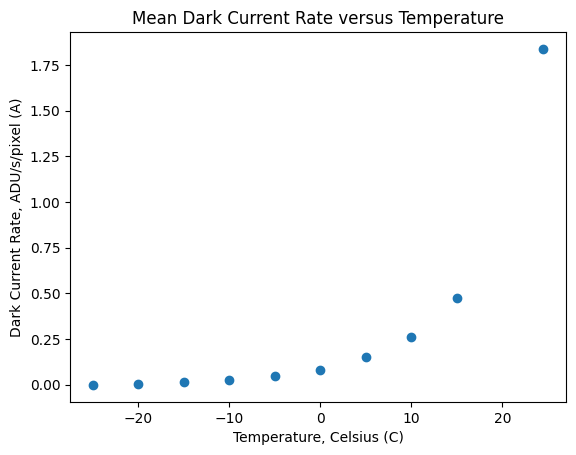

In [46]:
# plot mean dark current rate as a function of increasing temperature
plot_temps = [-25, -20, -15, -10, -5, 0, 5, 10, 15, 24.5]

plt.scatter(plot_temps, dark_current_mean)
plt.title('Mean Dark Current Rate versus Temperature')
plt.xlabel('Temperature, Celsius (C)')
plt.ylabel('Dark Current Rate, ADU/s/pixel (A)')

Text(0, 0.5, 'Dark Current Rate, ADU/s/pixel (A)')

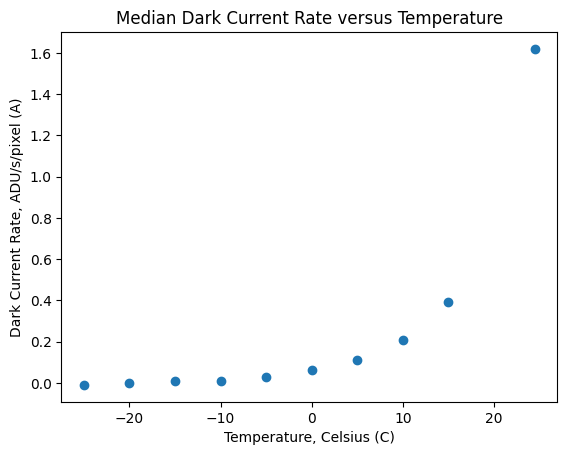

In [47]:
# reproduce plot for median
plt.scatter(plot_temps, dark_current_med)
plt.title('Median Dark Current Rate versus Temperature')
plt.xlabel('Temperature, Celsius (C)')
plt.ylabel('Dark Current Rate, ADU/s/pixel (A)')